<a href="https://colab.research.google.com/github/jethcherry/Machine-learning/blob/main/weatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Decision Tree Algorithm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [5]:
data = pd.read_csv("/daily_weather.csv")

In [6]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [7]:
data.tail()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
1090,1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18
1091,1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34
1092,1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31
1093,1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28
1094,1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10


In [8]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [9]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [10]:
del data["number"]

In [11]:
before_rows = data.shape[0]
print(before_rows)

1095


In [12]:
data=data.dropna()

In [13]:
after_rows = data.shape[0]
print(after_rows)

1064


In [14]:
before_rows-after_rows

31

In [15]:
clean_data = data.copy()
clean_data["high_humidity_label"] = (clean_data["relative_humidity_3pm"]>24.99)*1
print(clean_data["high_humidity_label"])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [16]:
y = clean_data[["high_humidity_label"]].copy()

In [17]:
clean_data["relative_humidity_3pm"].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [18]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use 9am Sensor Signals as Features to Predict Humidity at 3pm
<br><br></p>


In [19]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [20]:
X = clean_data[morning_features].copy()

In [21]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [22]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [23]:
#s[litting the data so that tarin data = 67% and test data = 33%]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=324)

In [24]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
841,918.370000,72.932000,184.500000,2.013246,186.700000,2.773806,0.0,0.0
75,920.100000,53.492000,186.100000,13.444009,193.800000,15.367778,0.0,0.0
95,927.610000,54.896000,55.000000,4.988376,53.400000,7.202947,0.0,0.0
895,919.235153,65.951112,194.343333,2.942019,216.569792,3.658810,0.0,0.0
699,919.888128,68.687822,228.517730,3.960858,247.954028,5.185547,0.0,0.0


In [25]:
y.describe()

,high_humidity_label
count,1064.000000
mean,0.497180
std,0.500227
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.

<BR>
In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


In [26]:
#max_leaf_nodes= 10 prevents overfitting
#random_state=0 sample split is generated each time
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes= 10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [27]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [28]:
prediction = humidity_classifier.predict(X_test)

In [29]:
prediction[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [30]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>

In [31]:
accuracy_score(y_true=y_test,y_pred=prediction)

0.8153409090909091

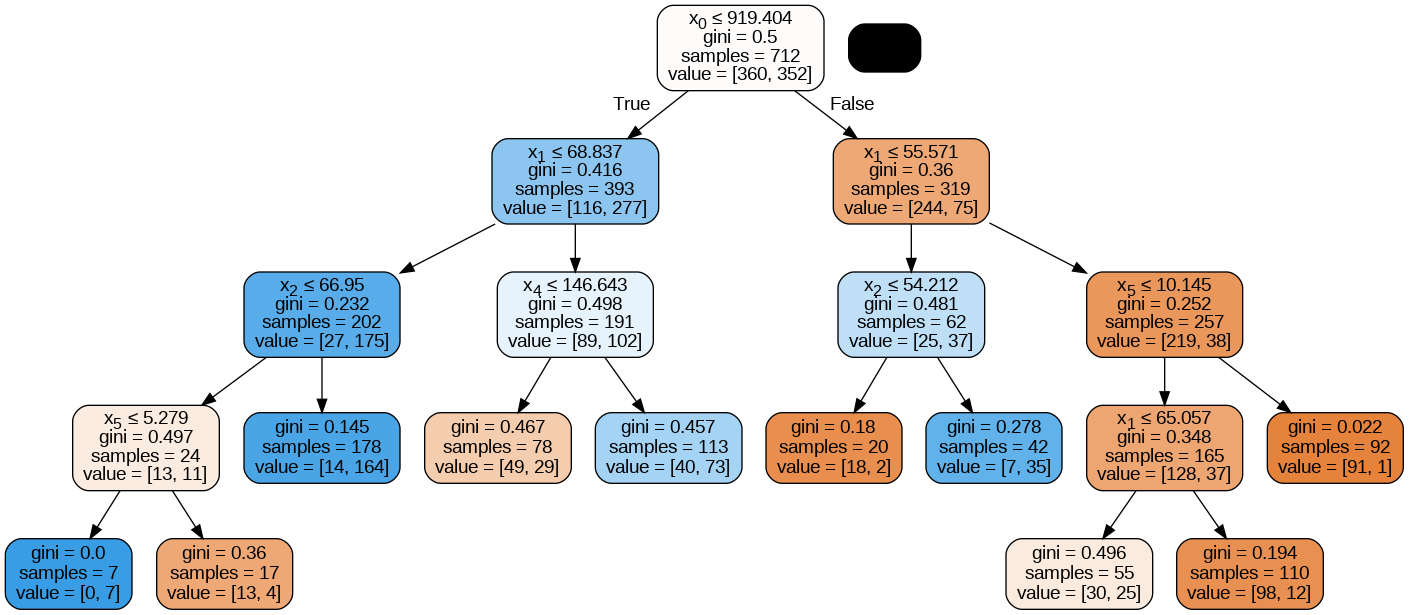

In [32]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())